In [110]:
%matplotlib notebook
import sqlite3
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
sns.set()

In [109]:
def deleteTimestampRange(lower,upper):
    sql = '''delete from button_press where timestamp >= "%s" and timestamp =< "%s%''' % (lower,upper)
    doQueryWrite(sql)
    
def doQueryWrite(sql):
    conn = sqlite3.connect('two_buttons.db')
    cur = conn.cursor()
    cur.execute(sql)

    conn.commit()
    conn.close()
    
def drop_table():
    # DROP TABLE
    conn = sqlite3.connect('two_buttons.db')
    cur = conn.cursor()
    cur.execute('''DROP TABLE button_press''')

    conn.commit()
    conn.close()

def create_table():
    # CREATE TABLE
    conn = sqlite3.connect('two_buttons.db')
    cur = conn.cursor()
    cur.execute('''CREATE TABLE button_press (timestamp text, button_id int)''')

    conn.commit()
    conn.close()

def read_table():
    # READ TABLE
    conn = sqlite3.connect('two_buttons.db')
    cur = conn.cursor()
    cur.execute('''SELECT * FROM button_press''')
    results = cur.fetchall()
    conn.close()
    return results

def insert_into_table():
    # INSERT INTO TABLE
    conn = sqlite3.connect('two_buttons.db')
    cur = conn.cursor()
    text = 'this_timestamp_text'
    id = 0
    cur.execute("INSERT INTO button_press VALUES ('%s','%s')" % (text, id))
    conn.commit()
    conn.close()

def string_to_datetime(datetime_string):
    year,month,day,hour,minute,second,millisecond = [int(i) for i in datetime_string.split('.')]
    return datetime.datetime(*[year,month,day,hour,minute,second,millisecond * 1000])

def timedeltas(timestampData):
    datetimes = [string_to_datetime(thisTimeStamp[0]) for thisTimeStamp in timestampData]
    deltas = [(datetimes[i] - datetimes[i-1]).total_seconds() for i in range(1,len(datetimes))]
    return deltas

In [117]:
results = read_table()
print(len(results))
results[-10:]

1846


[('2018.04.22.09.51.16.374', 0),
 ('2018.04.22.09.51.22.362', 0),
 ('2018.04.22.09.51.35.129', 0),
 ('2018.04.22.09.51.41.913', 0),
 ('2018.04.22.09.51.48.256', 0),
 ('2018.04.22.09.51.55.385', 0),
 ('2018.04.22.09.52.01.575', 0),
 ('2018.04.22.09.52.07.570', 0),
 ('2018.04.22.09.52.14.128', 0),
 ('2018.04.22.09.52.20.385', 0)]

<IPython.core.display.Javascript object>


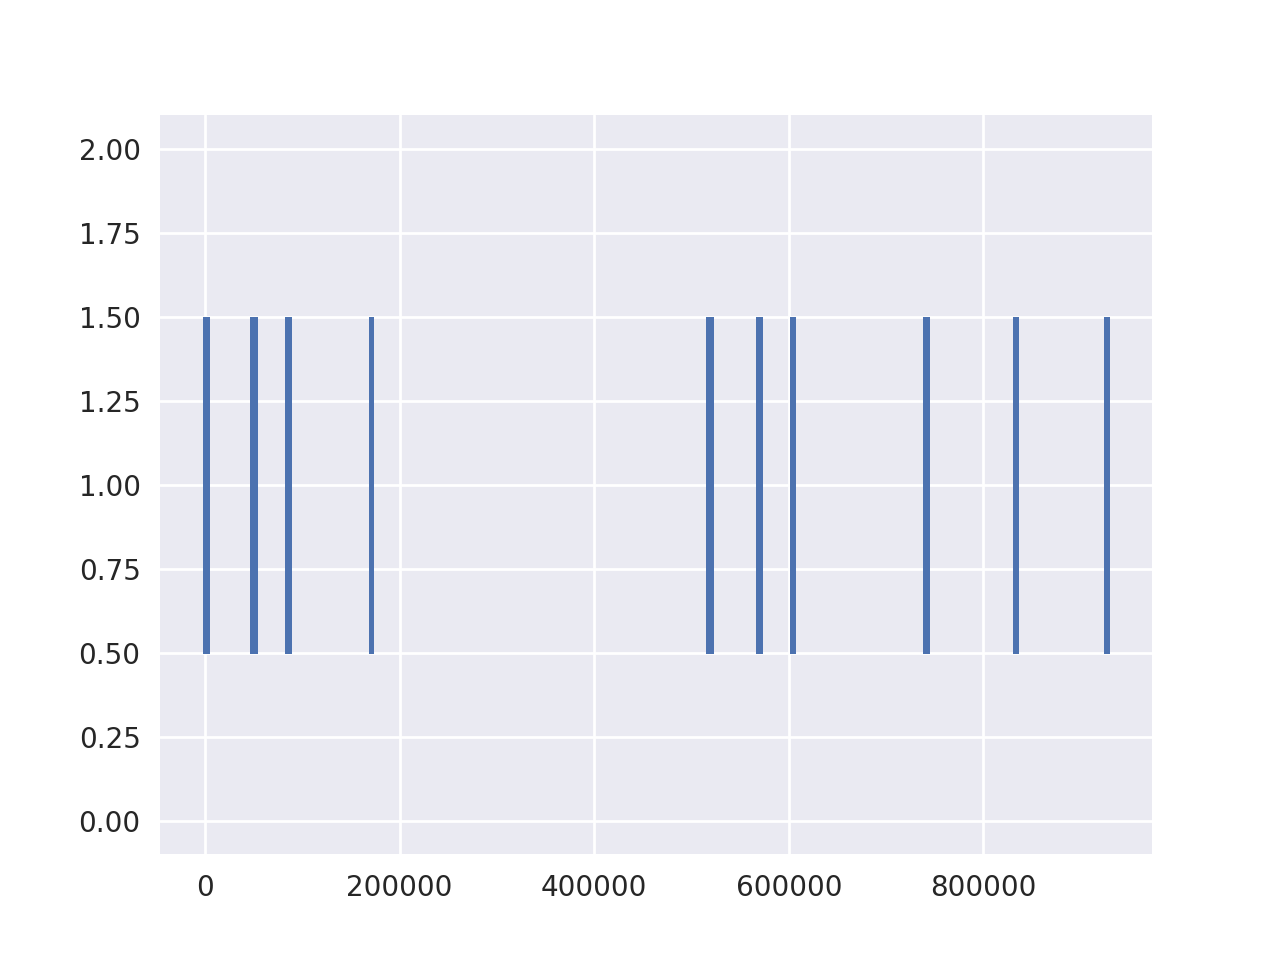

In [116]:
results = read_table()
deltas = timedeltas(results)
plt.figure()
plt.eventplot(np.cumsum(deltas))